In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from google.colab import drive
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

drive.mount('/content/drive')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Mounted at /content/drive


In [2]:
sales_train = pd.read_csv("/content/drive/MyDrive/Projects/competitive-data-science-predict-future-sales/sales_train.csv")
item = pd.read_csv("/content/drive/MyDrive/Projects/competitive-data-science-predict-future-sales/items.csv")
item_categories = pd.read_csv("/content/drive/MyDrive/Projects/competitive-data-science-predict-future-sales/item_categories.csv")
shops = pd.read_csv("/content/drive/MyDrive/Projects/competitive-data-science-predict-future-sales/shops.csv")


In [ ]:
print(sales_train.head(2))
print(shops.head(2))
print(item.head(2))
print(item_categories.head(2))

In [3]:
sales_train = sales_train.merge(shops, how="left", on="shop_id")
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум"""
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум"""
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум"""
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум"""


In [4]:
sales_train = sales_train.merge(item, how="left", on="item_id")
sales_train.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37
1,03.01.2013,0,25,2552,899.0,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58


In [5]:
sales_train = sales_train.merge(item_categories, how="left", on="item_category_id")
sales_train.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.0,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил


In [6]:
sales_train.shape

(2935849, 10)

In [7]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   shop_name           object 
 7   item_name           object 
 8   item_category_id    int64  
 9   item_category_name  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 246.4+ MB


In [8]:
print("Unique Shop Id: ", sales_train['shop_id'].nunique())
print("Unique Item ids: ", sales_train['item_id'].nunique())
print("Unique Category ids: ", sales_train['item_category_id'].nunique())

Unique Shop Id:  60
Unique Item ids:  21807
Unique Category ids:  84


In [9]:
no_of_shop_in_month = sales_train.groupby('date_block_num').agg(
    shops  = ('shop_id' , pd.Series.nunique),
    item_id  = ('item_id', pd.Series.nunique),
    category_id  = ('item_category_id', pd.Series.nunique)
).sort_values(by='date_block_num').reset_index()
no_of_shop_in_month

,date_block_num,shops,item_id,category_id
0,0,45,8115,56
1,1,46,8168,57
2,2,46,8302,53
3,3,46,8145,54
4,4,45,8339,60
5,5,46,8478,57
6,6,46,8405,59
7,7,45,8031,59
8,8,45,7876,59
9,9,46,8039,61


In [10]:
lvled_data = sales_train.groupby(['date_block_num', 'shop_id', 'item_id']).agg(
    item_category_id  = ('item_category_id', pd.Series.unique),
        shop_name  = ('shop_name', pd.Series.unique),
    item_name  = ('item_name', pd.Series.unique),
    item_category_name  = ('item_category_name', pd.Series.unique),
    item_price  = ('item_price' , sum),
    item_cnt_day  = ('item_cnt_day', sum)
).sort_values(by='shop_id').reset_index()
lvled_data.head()

,date_block_num,shop_id,item_id,item_category_id,shop_name,item_name,item_category_name,item_price,item_cnt_day
0,0,0,32,40,"!Якутск Орджоникидзе, 56 фран",1+1,Кино - DVD,884.0,6.0
1,1,0,7894,6,"!Якутск Орджоникидзе, 56 фран",X360: Геймпад проводной чёрный - Controller BL...,Аксессуары - XBOX 360,9888.0,9.0
2,1,0,7893,6,"!Якутск Орджоникидзе, 56 фран",X360: Геймпад беспроводной черный - Wireless C...,Аксессуары - XBOX 360,20622.0,26.0
3,1,0,7892,6,"!Якутск Орджоникидзе, 56 фран",X360: Геймпад беспроводной черный + Halo 4 (GT...,Аксессуары - XBOX 360,11336.0,4.0
4,1,0,7882,6,"!Якутск Орджоникидзе, 56 фран",X360: Super ZOOM [только для Kinect],Аксессуары - XBOX 360,5140.0,5.0


#### How Item counts are varying with Price within each shops

In [11]:
# total_corr = 0
corr_df = pd.DataFrame(columns=('shop_id', 'correlation'))

In [12]:
shop_id = lvled_data.shop_id.unique().tolist()

In [13]:
for i in shop_id:
  lvled_data_oneshop = lvled_data[lvled_data['shop_id']==i]
  one_corr = lvled_data_oneshop['item_price'].corr(lvled_data_oneshop.item_cnt_day)
  corr_df = corr_df.append({'shop_id':i, 'correlation':one_corr}, ignore_index=True)

In [25]:

corr_df.shop_id = corr_df.shop_id.astype(int)
corr_df.head()

,shop_id,correlation
0,0,0.284646
1,1,0.230904
2,2,0.348810
3,3,0.283086
4,4,0.185246


Text(0, 0.5, 'Corr Item_Price Item_Cnt')

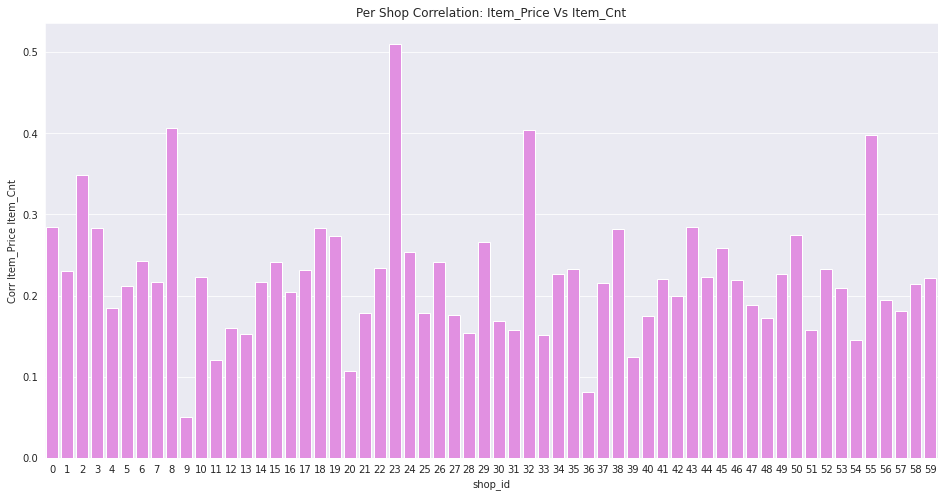

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
# pal = sns.color_palette("Greens_d", len(corr_df))
# rank = corr_df.argsort().argsort()


ax = sns.barplot(x='shop_id', y='correlation', data=corr_df,color = 'violet')# palette=np.array(pal[::-1])[rank])
ax.set_title('Per Shop Correlation: Item_Price Vs Item_Cnt')
ax.set_ylabel('Corr Item_Price Item_Cnt')

In [15]:
corr_df['correlation'].mean()

0.22188338115309245

#### How item counts are varying with price considering each shop

In [ ]:
lvled_data['item_price'].corr(lvled_data['item_cnt_day'])

#### How item counts are varying with price across months each year

In [28]:
# total_corr = 0
corr_df2 = pd.DataFrame(columns=('date_block_num', 'correlation'))

date_block_num = lvled_data.date_block_num.unique().tolist()
for i in date_block_num:
  lvled_data_month = lvled_data[lvled_data['date_block_num']==i]
  one_corr2 = lvled_data_month['item_price'].corr(lvled_data_month.item_cnt_day)
  corr_df2 = corr_df2.append({'date_block_num':i, 'correlation':one_corr2}, ignore_index=True)


In [34]:

corr_df2.date_block_num = corr_df2.date_block_num.astype(int)
corr_df2.head()

,date_block_num,correlation
0,0,0.353380
1,1,0.390295
2,27,0.237587
3,2,0.431691
4,3,0.389079


Text(0, 0.5, 'Corr Item_Price Item_Cnt')

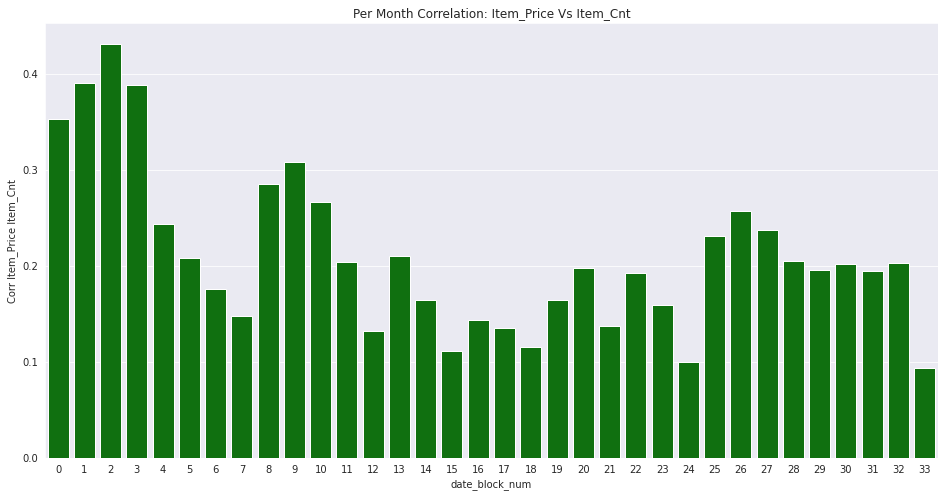

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
# pal = sns.color_palette("Greens_d", len(corr_df))
# rank = corr_df.argsort().argsort()


ax = sns.barplot(x='date_block_num', y='correlation', data=corr_df2,color = 'green')# palette=np.array(pal[::-1])[rank])
ax.set_title('Per Month Correlation: Item_Price Vs Item_Cnt')
ax.set_ylabel('Corr Item_Price Item_Cnt')

In [ ]:
corr_df2['correlation'].mean()

0.2116096819913944

In [ ]:
lvled_data_2013 = lvled_data[lvled_data['date_block_num']<12]
lvled_data_2014 = lvled_data[(lvled_data['date_block_num']> 11) & (lvled_data['date_block_num']<24)]
lvled_data_2015 = lvled_data[lvled_data['date_block_num']>23]


In [ ]:
print("Corr across months in 2013 is: ", lvled_data_2013.item_price.corr(lvled_data_2013.item_cnt_day))
print("Corr across months in 2014 is: ", lvled_data_2014.item_price.corr(lvled_data_2014.item_cnt_day))
print("Corr across months in 2015 is: ", lvled_data_2015.item_price.corr(lvled_data_2015.item_cnt_day))

Corr across months in 2013 is:  0.22814487469571712
Corr across months in 2014 is:  0.1575453569404927
Corr across months in 2015 is:  0.1574259300493679


In [ ]:
lvled_data.head()

,date_block_num,shop_id,item_id,item_category_id,shop_name,item_name,item_category_name,item_price,item_cnt_day
0,0,0,32,40,"!Якутск Орджоникидзе, 56 фран",1+1,Кино - DVD,884.0,6.0
1,1,0,7894,6,"!Якутск Орджоникидзе, 56 фран",X360: Геймпад проводной чёрный - Controller BL...,Аксессуары - XBOX 360,9888.0,9.0
2,1,0,7893,6,"!Якутск Орджоникидзе, 56 фран",X360: Геймпад беспроводной черный - Wireless C...,Аксессуары - XBOX 360,20622.0,26.0
3,1,0,7892,6,"!Якутск Орджоникидзе, 56 фран",X360: Геймпад беспроводной черный + Halo 4 (GT...,Аксессуары - XBOX 360,11336.0,4.0
4,1,0,7882,6,"!Якутск Орджоникидзе, 56 фран",X360: Super ZOOM [только для Kinect],Аксессуары - XBOX 360,5140.0,5.0
